In [7]:
from pyforest import*
lazy_imports()

['import pickle',
 'import tqdm',
 'import seaborn as sns',
 'import sklearn',
 'from sklearn.ensemble import RandomForestClassifier',
 'import nltk',
 'import bokeh',
 'import glob',
 'import re',
 'import pydot',
 'from dask import dataframe as dd',
 'import sys',
 'from sklearn.ensemble import RandomForestRegressor',
 'import xgboost as xgb',
 'import numpy as np',
 'import plotly.express as px',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.manifold import TSNE',
 'from sklearn import svm',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.model_selection import train_test_split',
 'import dash',
 'import matplotlib as mpl',
 'from pathlib import Path',
 'import plotly.graph_objs as go',
 'import lightgbm as lgb',
 'from pyspark import SparkContext',
 'import keras',
 'import pandas as pd',
 'import statistics',
 'from openpyxl import load_workbook',
 'import spacy',
 'import matplotlib.pyplot as plt',
 'import gensim',
 'im

In [8]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")



In [9]:
Train_data=pd.read_csv('Train.csv')
Test_data=pd.read_csv('Test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
Test_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
print("Train_data:",Train_data.shape)
print("Test_data:",Test_data.shape)


Train_data: (8523, 12)
Test_data: (5681, 11)


In [13]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [14]:
Train_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
Test_data.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
Train_data['source'] = 'train'
Test_data['source'] = 'test'
df = pd.concat([Train_data,Test_data],ignore_index=True)

<IPython.core.display.Javascript object>

In [17]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [18]:
df.tail()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [20]:
df.shape

(14204, 13)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

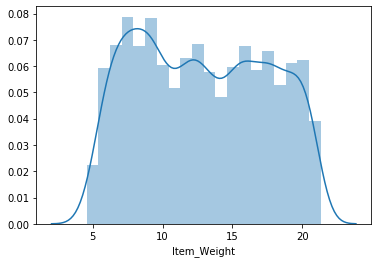

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

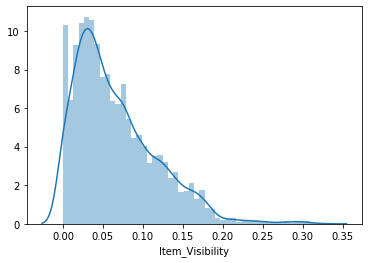

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

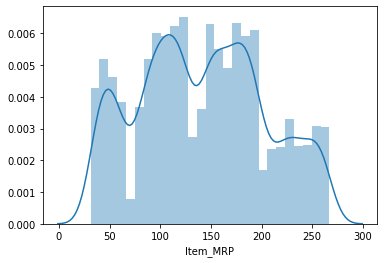

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

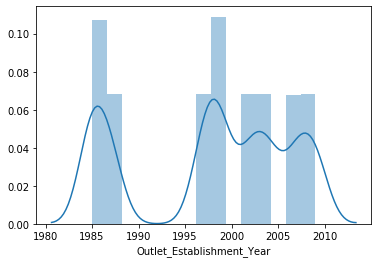

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

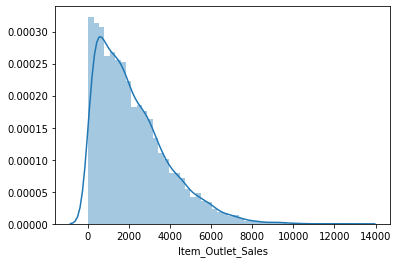

In [21]:
for i in Train_data.describe().columns:
    sns.distplot(Train_data[i].dropna())
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

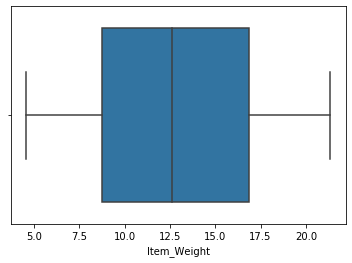

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

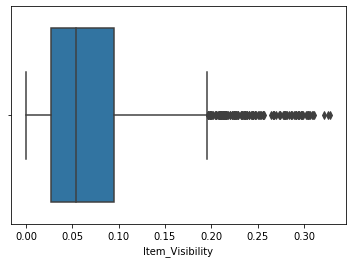

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

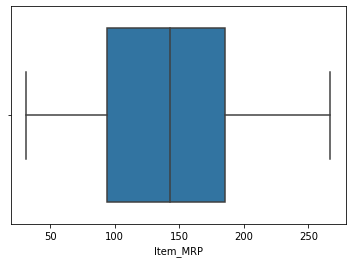

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

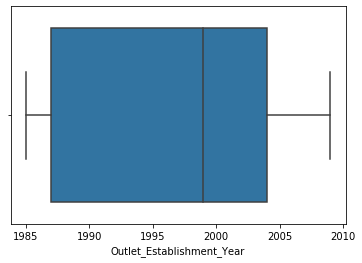

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

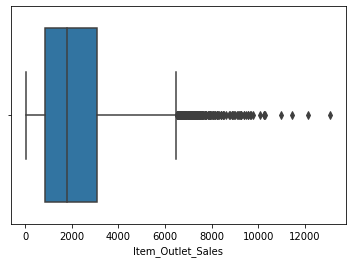

In [22]:
for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

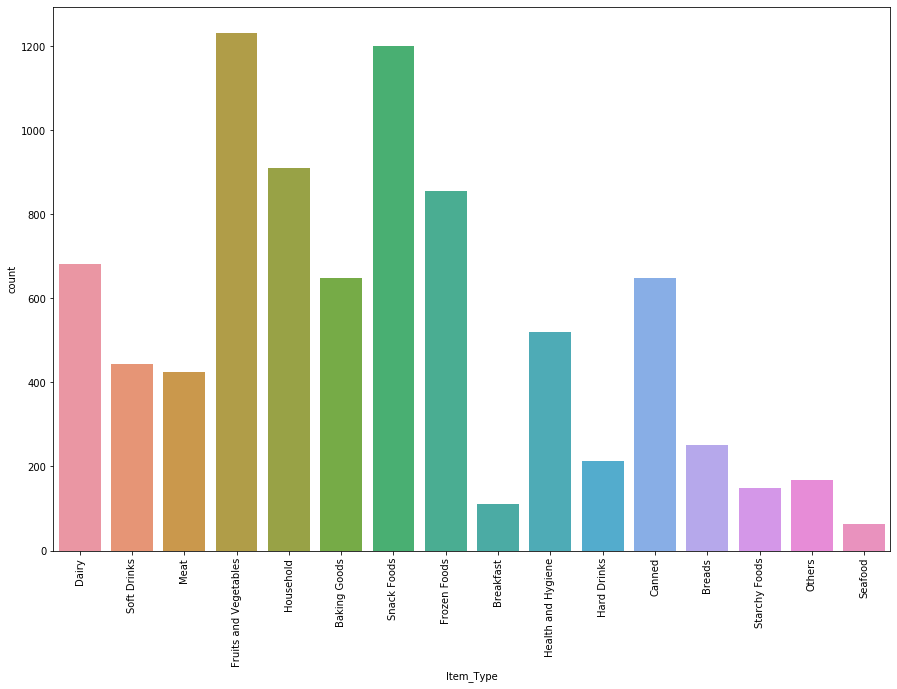

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(Train_data.Item_Type)
plt.xticks(rotation=90)


In [24]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

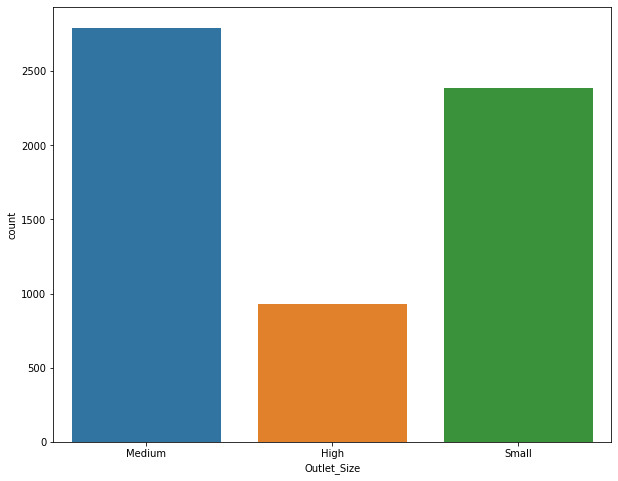

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Size)



In [26]:
Train_data.Outlet_Size.value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

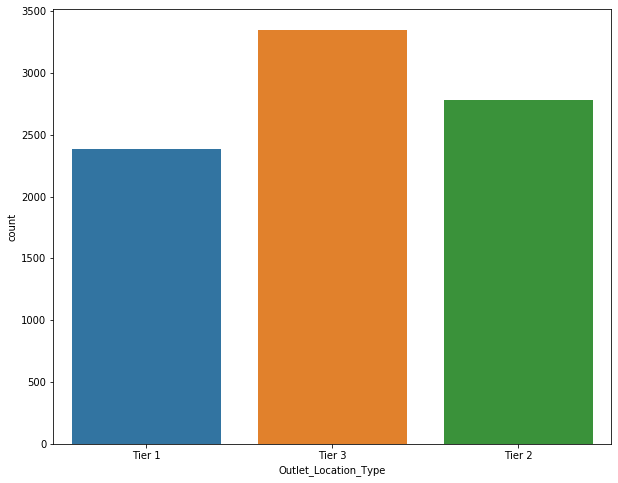

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Location_Type)



In [28]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

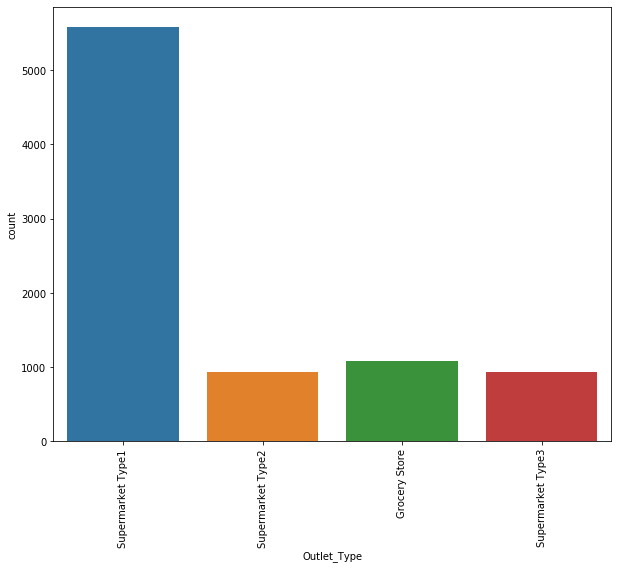

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Type)
plt.xticks(rotation=90)

In [30]:

Train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

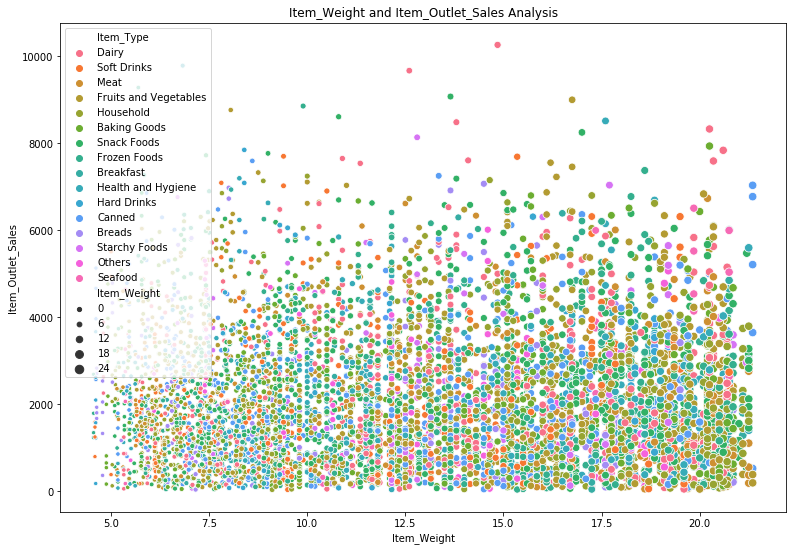

In [31]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
#plt.plot(Train_data.Item_Weight, Train_data.Item_Outlet_Sales, ‘.’,hue= ‘Item_Fat_Content’, alpha = 0.3)
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=Train_data)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

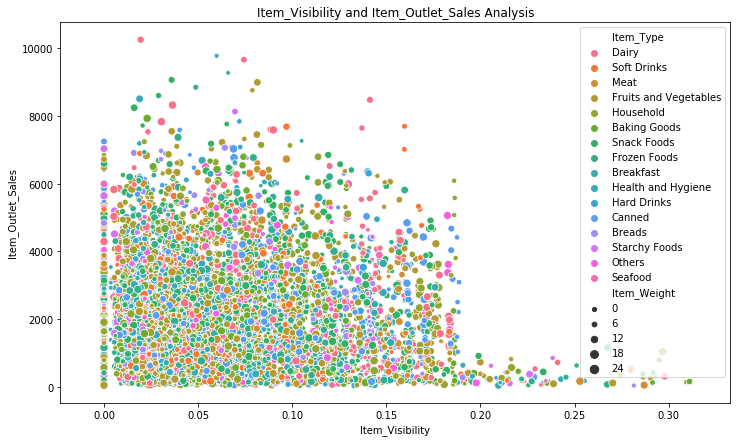

In [32]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
#plt.plot(Train_data.Item_Visibility, Train_data.Item_Outlet_Sales,“.”, alpha = 0.3)
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=Train_data)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

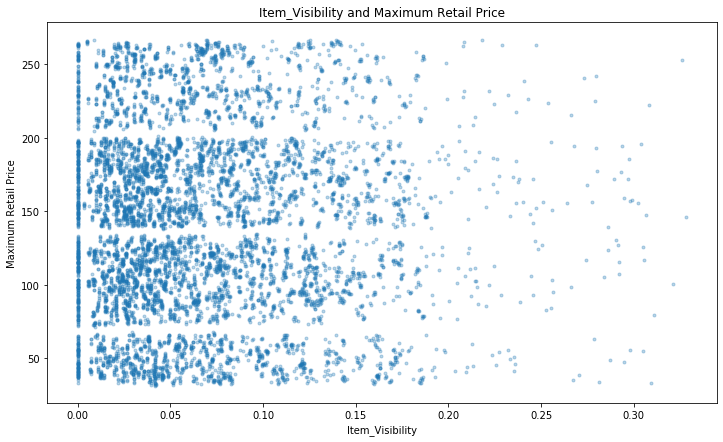

In [33]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item_Visibility and Maximum Retail Price")
plt.plot(Train_data.Item_Visibility, Train_data.Item_MRP,".", alpha = 0.3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

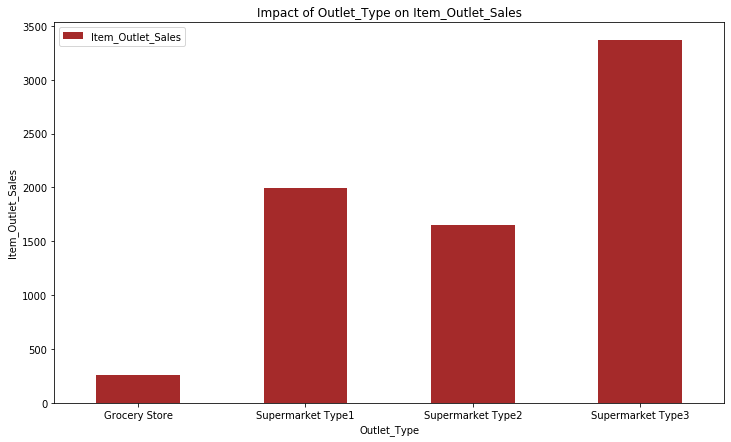

In [34]:
Outlet_Type_pivot = \
Train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='brown',figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

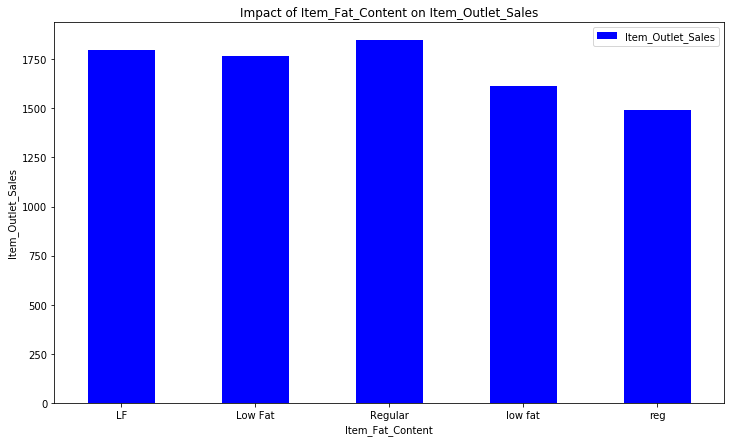

In [35]:
Item_Fat_Content_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content") 
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


In [36]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [37]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low  Fat',  're':'Regula','low fat':'Low Fat'})

In [38]:
df['Item_Fat_Content'].value_counts()

Low Fat     8663
Regular     4824
Low  Fat     522
reg          195
Name: Item_Fat_Content, dtype: int64

In [39]:
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low  Fat',  'reg':'Regular','low fat':'Low Fat'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

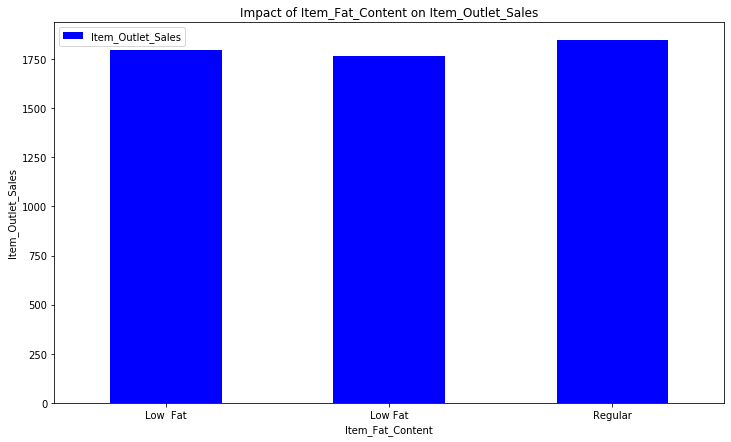

In [40]:
Item_Fat_Content_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content") 
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()



In [41]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

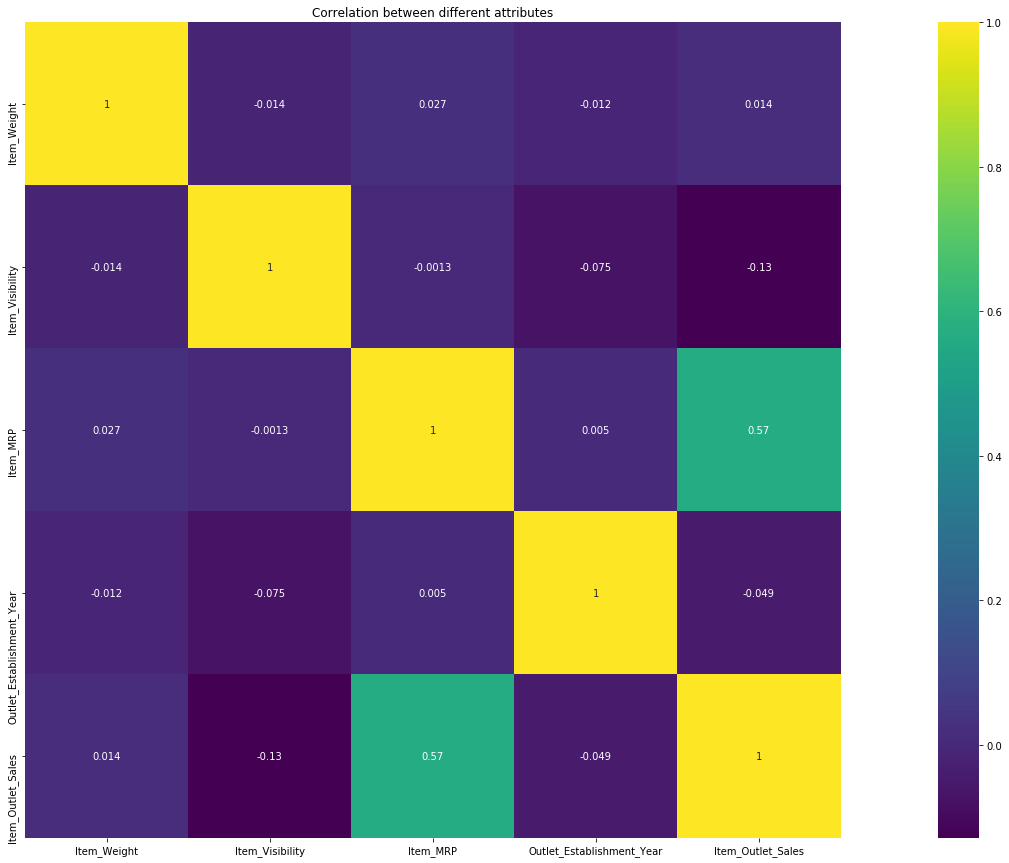

In [42]:
plt.figure(figsize=(35,15))
sns.heatmap(Train_data.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()



In [43]:
#FEATURE ENGINEERING


In [ ]:
#Item_Weight

In [44]:
df['Item_Weight'].mean() #we will replace the NaN values with this mean

12.792854228644991

In [46]:
df ['Item_Weight'] .fillna(df['Item_Weight'].mean(),inplace=True)    ## missing is replaced


In [ ]:
#Outlet size


In [47]:
 df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [53]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [54]:
df.isnull().sum()  #now we dont have any null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [59]:
Train_data.shape

(8523, 13)

In [60]:
df.shape

(14204, 13)

In [ ]:
 #ITEM VISIBILITY

In [55]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [61]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)  ## 0 is replaced

In [ ]:
#OUTLET YEARS

In [63]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [67]:
df ['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']
df ['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [ ]:
#ITEM TYPE

In [69]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [70]:
df['Item_Identifier'].value_counts()


FDP59    10
FDD17    10
NCP02    10
FDW10    10
NCU29    10
         ..
FDO33     7
FDM10     7
DRN11     7
FDM50     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64